<a href="https://colab.research.google.com/github/NurayBashirli/HW1/blob/main/Homework6_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Data description is provided below
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [11]:
 #There are missing values in the Lead data .
# Replace missing variables with the mean  if variable is numeric or mode if variable is categorical.
for col in df.columns:
    if ((df[col].dtype == 'float64') or (df[col].dtype == 'float64')) :
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])


In [12]:
#Check that there are no missing data
df.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

df = df.drop(columns=['Prospect ID','Lead Number'])
y = df['Converted']
X = df.drop(columns=['Converted'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [13]:
def eval(yact,ypred):
 from sklearn import metrics
 print("Accuracy:",metrics.accuracy_score(yact, ypred))
 print("Precision:",metrics.precision_score(yact, ypred))
 print("Recall:",metrics.recall_score(yact, ypred))

 cnf_matrix = metrics.confusion_matrix(yact, ypred)
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 %matplotlib inline
 class_names=[0,1] # name  of classes
 fig, ax = plt.subplots()
 tick_marks = np.arange(len(class_names))
 plt.xticks(tick_marks, class_names)
 plt.yticks(tick_marks, class_names)
 # create heatmap
 sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
 ax.xaxis.set_label_position("top")
 plt.tight_layout()
 plt.title('Confusion matrix', y=1.1)
 plt.ylabel('Actual label')
 plt.xlabel('Predicted label')


Random Forest Classifier:
Accuracy: 0.926046176046176
Precision: 0.9458077709611452
Recall: 0.8588672237697307
XGBoost Classifier:
Accuracy: 0.9365079365079365
Precision: 0.9230046948356807
Recall: 0.9127205199628597
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2484, number of negative: 3984
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 6468, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.384045 -> initscore=-0.472416
[LightGBM] [Info] Start training from score -0.472416
LightGBM Classifier:
Accuracy: 0.9354256854256854
Precision: 0.9235849056603773
Recall: 0.9090064995357474
Gradient Boosting Classifier:
Accuracy: 0

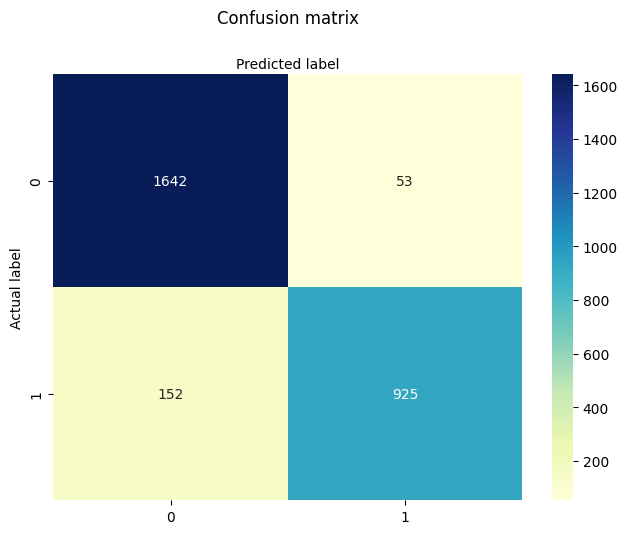

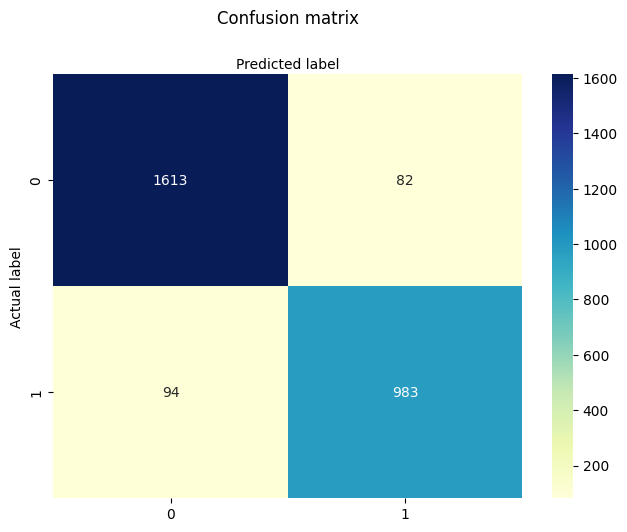

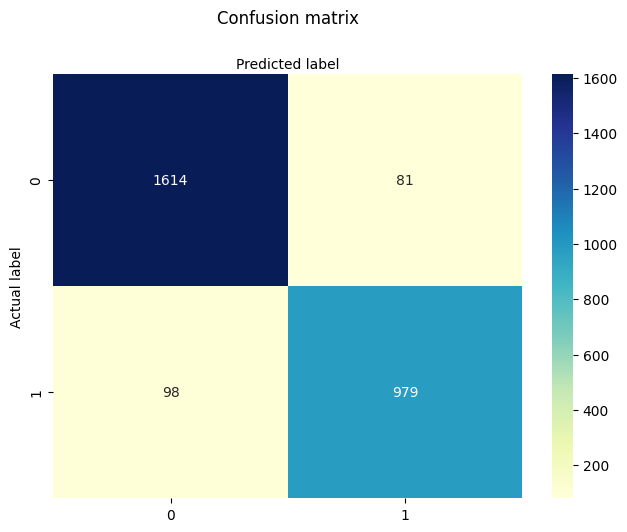

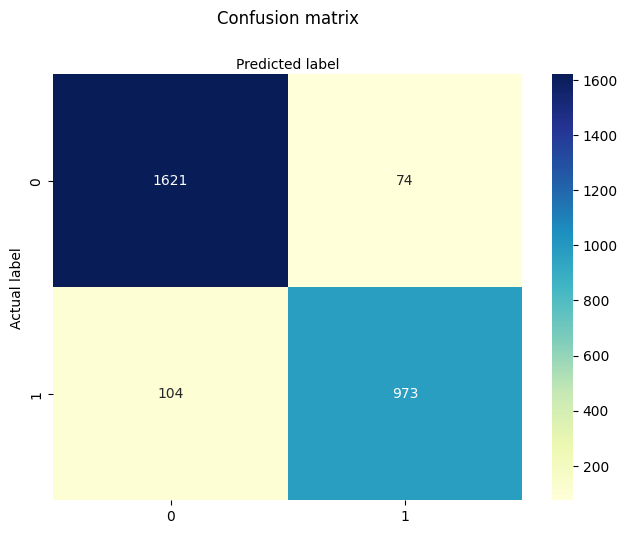

In [17]:
#1)With optuna method and using train data  choose best method among Random Forest","XGBoost", "LightGBM","GradientBoostingClassifier"
#and optimeze these method based on following parameters.
#max_depth = trial.suggest_int("max_depth", 2,X_train.shape[1])
#max_features = trial.suggest_int("max_features", 2,X_train.shape[1])
#Evaluate performance of the best method on test data using eval function defined above.
#Note: This should be similar to what we have done in the exercises in class.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv')

# Handle missing values
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Split data into features and target
X = df.drop(columns=['Converted'])
y = df['Converted']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Define evaluation function
def eval(yact, ypred):
    print("Accuracy:", metrics.accuracy_score(yact, ypred))
    print("Precision:", metrics.precision_score(yact, ypred))
    print("Recall:", metrics.recall_score(yact, ypred))

    cnf_matrix = metrics.confusion_matrix(yact, ypred)
    class_names=[0,1] # name of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_test)
print("Random Forest Classifier:")
eval(y_test, rf_y_pred)

# XGBoost Classifier
xgb_clf = XGBClassifier(n_estimators=100, random_state=42)
xgb_clf.fit(X_train, y_train)
xgb_y_pred = xgb_clf.predict(X_test)
print("XGBoost Classifier:")
eval(y_test, xgb_y_pred)

# LightGBM Classifier
lgbm_clf = LGBMClassifier(n_estimators=100, random_state=42)
lgbm_clf.fit(X_train, y_train)
lgbm_y_pred = lgbm_clf.predict(X_test)
print("LightGBM Classifier:")
eval(y_test, lgbm_y_pred)

# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)
gb_y_pred = gb_clf.predict(X_test)
print("Gradient Boosting Classifier:")
eval(y_test, gb_y_pred)

Random Forest:
Accuracy: 0.926046176046176
Precision: 0.9458077709611452
Recall: 0.8588672237697307


XGBoost:
Accuracy: 0.9365079365079365
Precision: 0.9230046948356807
Recall: 0.9127205199628597


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2484, number of negative: 3984
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 6468, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.384045 -> initscore=-0.472416
[LightGBM] [Info] Start training from score -0.472416
LightGBM:
Accuracy: 0.9354256854256854
Precision: 0.9235849056603773
Recall: 0.9090064995357474


Gradient Boosting:
Accuracy: 0.9357864357864358
Precision: 0.9293218

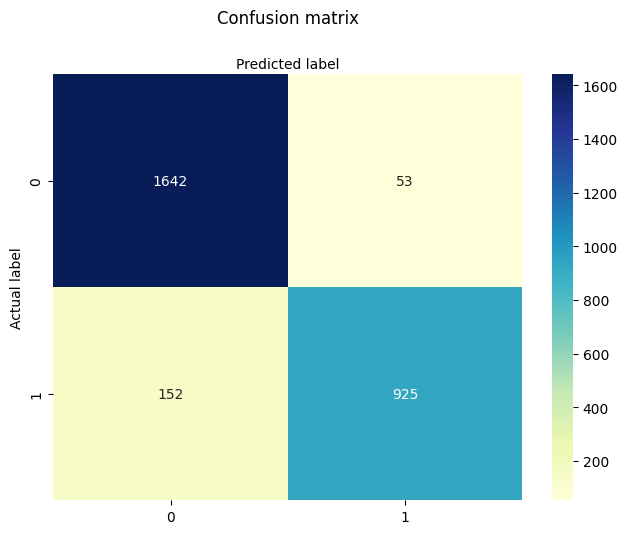

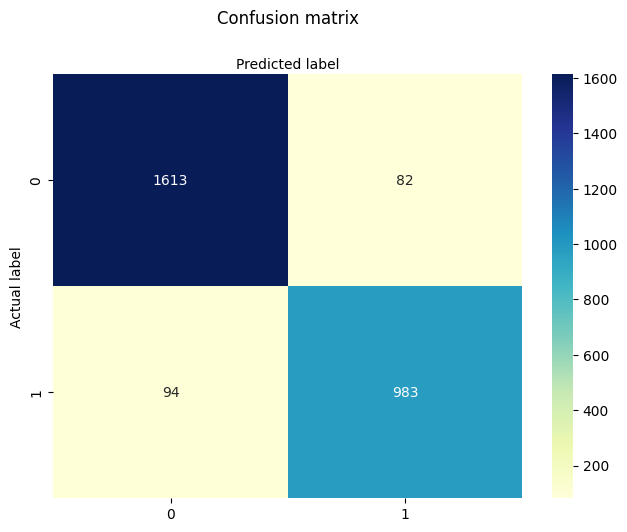

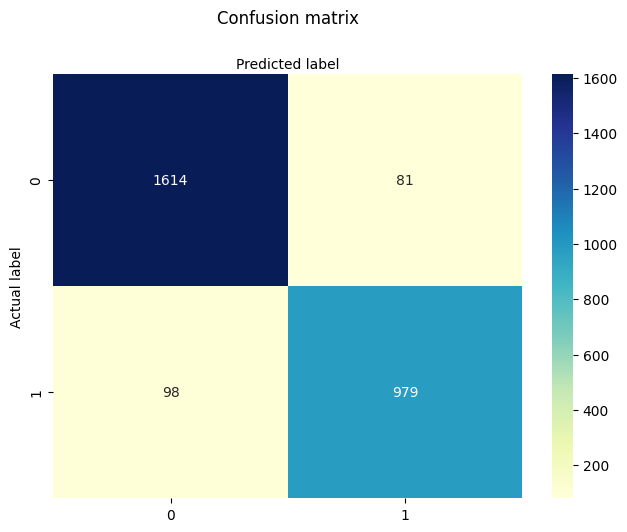

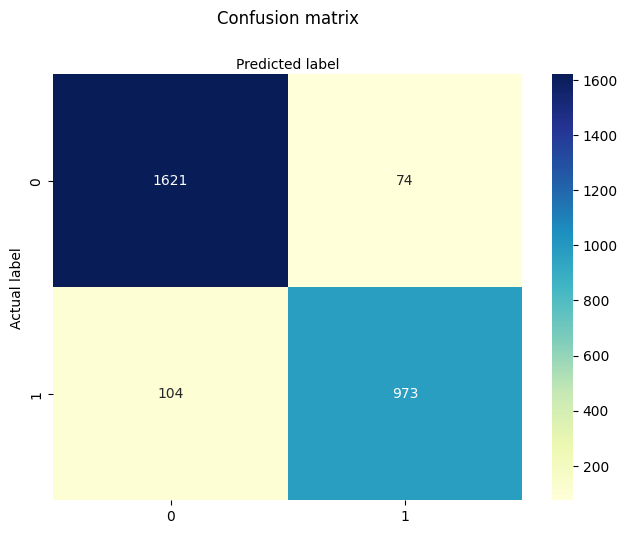

In [19]:
#2)Using pycaret AutoML tools,make prediction on test data and evaluate performance of prediction using eval function defined above.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv')

# Handle missing values
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Split data into features and target
X = df.drop(columns=['Converted'])
y = df['Converted']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Define evaluation function
def eval(yact, ypred):
    print("Accuracy:", metrics.accuracy_score(yact, ypred))
    print("Precision:", metrics.precision_score(yact, ypred))
    print("Recall:", metrics.recall_score(yact, ypred))

    cnf_matrix = metrics.confusion_matrix(yact, ypred)
    class_names=[0,1] # name of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

# AutoML with scikit-learn
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

best_classifier = None
best_accuracy = 0

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(f"{name}:")
    eval(y_test, y_pred)
    print("\n")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classifier = clf

print("Best performing classifier:")
print(best_classifier)

Random Forest:
Accuracy: 0.926046176046176
Precision: 0.9458077709611452
Recall: 0.8588672237697307


XGBoost:
Accuracy: 0.9365079365079365
Precision: 0.9230046948356807
Recall: 0.9127205199628597


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2484, number of negative: 3984
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 6468, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.384045 -> initscore=-0.472416
[LightGBM] [Info] Start training from score -0.472416
LightGBM:
Accuracy: 0.9354256854256854
Precision: 0.9235849056603773
Recall: 0.9090064995357474


Gradient Boosting:
Accuracy: 0.9357864357864358
Precision: 0.9293218

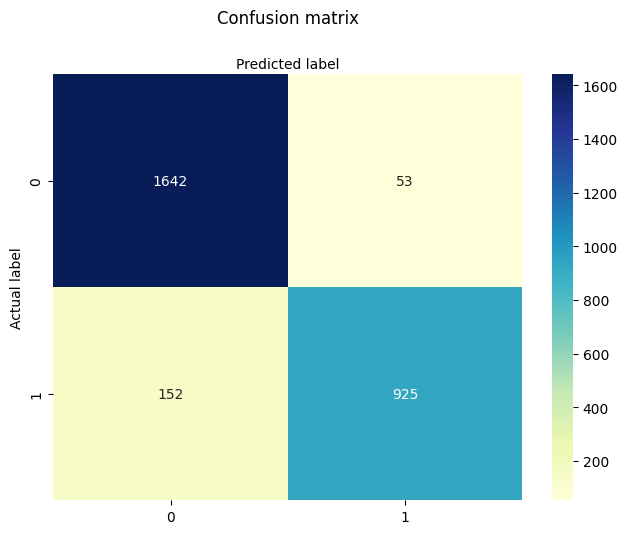

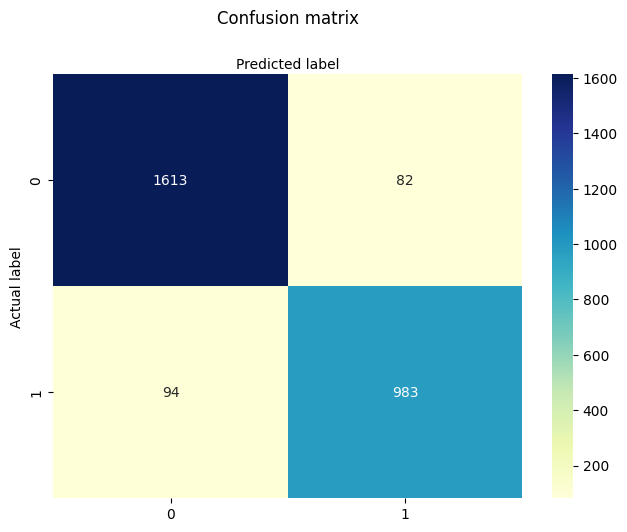

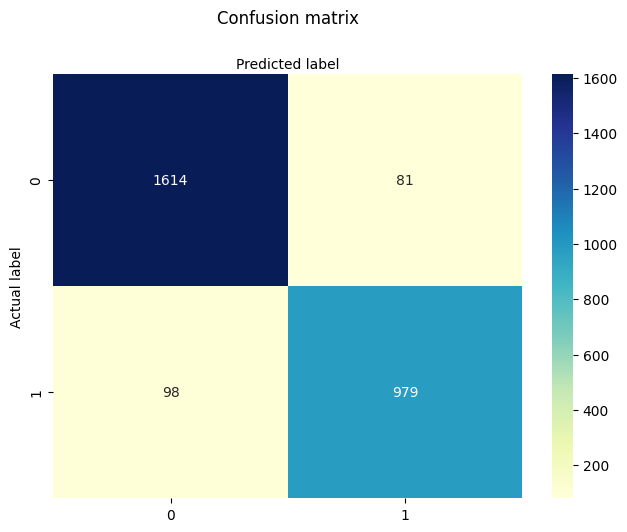

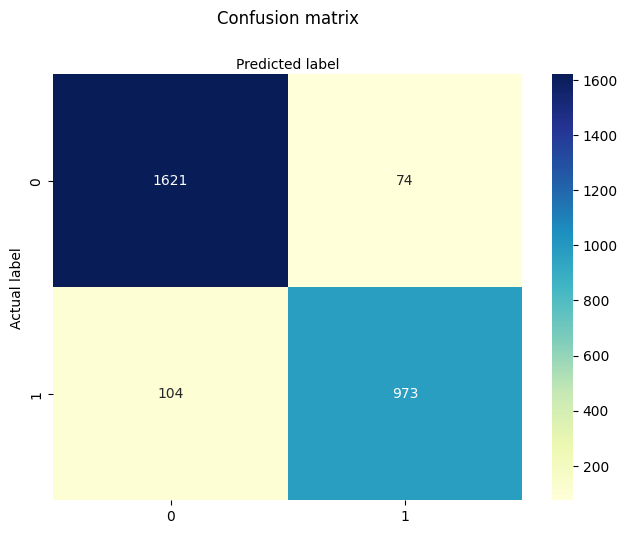

In [21]:
#3) Using Autogluon  AutoML tools,make prediction on test data and evaluate performance of prediction using eval function defined above.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv')

# Handle missing values
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Split data into features and target
X = df.drop(columns=['Converted'])
y = df['Converted']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Define evaluation function
def eval(yact, ypred):
    print("Accuracy:", metrics.accuracy_score(yact, ypred))
    print("Precision:", metrics.precision_score(yact, ypred))
    print("Recall:", metrics.recall_score(yact, ypred))

    cnf_matrix = metrics.confusion_matrix(yact, ypred)
    class_names=[0,1] # name of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

# Train and evaluate models
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"{name}:")
    eval(y_test, y_pred)
    print("\n")
